In [8]:
import torch
from model import UNet
from dataset import RetinaDataset
from utils import load_data
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import PIL
import numpy as np
import cv2 as cv

In [2]:
train_images, train_masks, test_images, test_masks = load_data("/scratch/y.aboelwafa/Retina_Blood_Vessel_Segmentation/dataset")

In [3]:
train_dataset = RetinaDataset(train_images, train_masks)
test_dataset = RetinaDataset(test_images, test_masks)

In [17]:
X, y = train_dataset[0]
print(X.shape, y.shape)

torch.Size([3, 512, 512]) torch.Size([1, 512, 512])


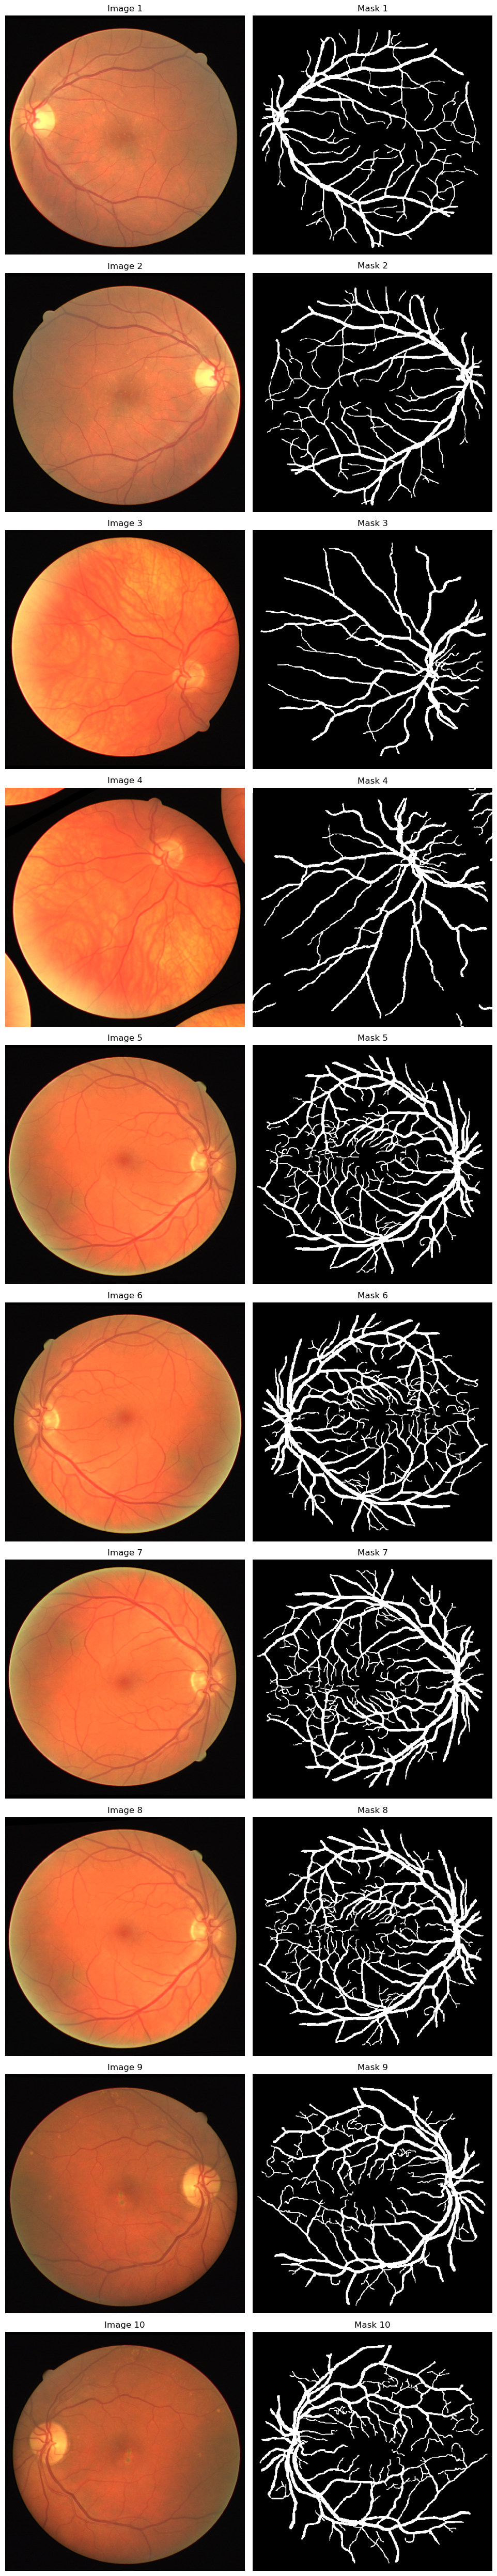

In [18]:
num_images = 10
fig, axs = plt.subplots(num_images, 2, figsize=(10, 5*num_images))

for i in range(num_images):
    image_tensor, mask_tensor = train_dataset[i]
    
    # Convert the image tensor from CxHxW to HxWxC for plotting
    image = image_tensor.numpy().transpose(1, 2, 0)
    mask = mask_tensor.numpy().squeeze()  # Remove the channel dimension from the mask
    
    axs[i, 0].imshow(image)
    axs[i, 0].axis('off')
    axs[i, 0].set_title(f'Image {i+1}')
    
    axs[i, 1].imshow(mask, cmap='gray')
    axs[i, 1].axis('off')
    axs[i, 1].set_title(f'Mask {i+1}')

plt.tight_layout()
plt.show()